In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from glob import glob
import pickle
from sklearn.decomposition import PCA
%matplotlib inline

In [2]:
# load numpy zip
data = np.load('./data/data_10000_norm.npz')
data.files

['arr_0', 'arr_1']

In [3]:
X  = data['arr_0'] 
y = data['arr_1'] 

X.shape, y.shape

((5460, 10000), (5460,))

###  Create eigen Image

In [4]:
# subtract all the columns with the mean of that column
X1 = X - X.mean(axis=0) 

In [5]:
pca = PCA(n_components=None,whiten=True,svd_solver='auto')
x_pca = pca.fit_transform(X1)
x_pca.shape
# takes about 2 mins


(5460, 5460)

In [6]:
eigen_ratio = pca.explained_variance_ratio_
eigen_ratio_cum = np.cumsum(eigen_ratio)

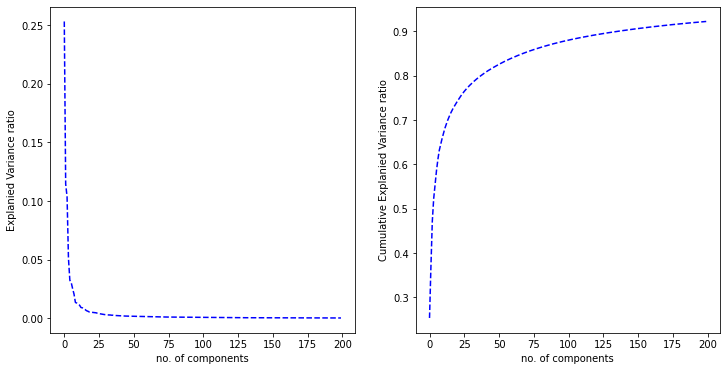

In [7]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(eigen_ratio[:200],'b--')
plt.xlabel('no. of components')
plt.ylabel('Explanied Variance ratio')
plt.subplot(1,2,2)
plt.xlabel('no. of components')
plt.ylabel('Cumulative Explanied Variance ratio')
plt.plot(eigen_ratio_cum[:200],'b--')
plt.show()

In order to get min 80% variance we are considering 50 compoenents

In [8]:
pca_50 = PCA(n_components=50,whiten=True,svd_solver='auto')
x_pca_50 = pca_50.fit_transform(X1)
x_pca_50.shape

(5460, 50)

In [9]:
pickle.dump(pca_50,open('./model/pca_50.pkl','wb'))

In [10]:
# consider 50 compnent and inverse transform
x_pca_inv = pca_50.inverse_transform(x_pca_50)
x_pca_inv.shape

(5460, 10000)

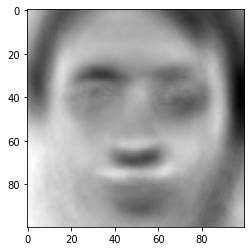

In [11]:
# consider one image (one row)
eig_img = x_pca_inv[0,:]
eig_img = eig_img.reshape((100,100))
plt.imshow(eig_img,cmap='gray')

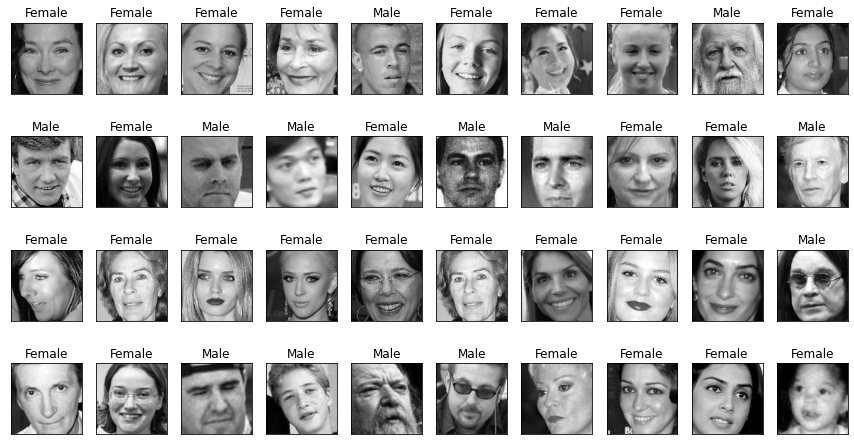

====================Eigen Images====================


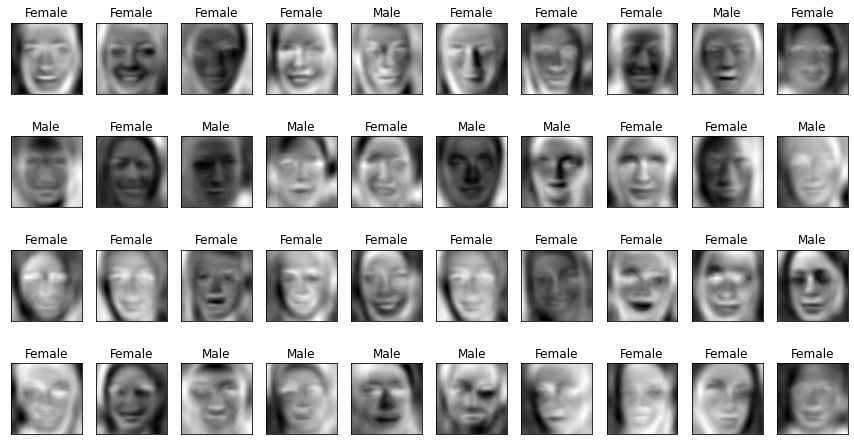

In [12]:
def label(y):
    if y==0:
        return 'Male'
    else:
        return 'Female'
    
np.random.randint(1001)
pics = np.random.randint(0,5451,40)
plt.figure(figsize=(15,8))
for i,pic in enumerate(pics):
    plt.subplot(4,10,i+1)
    img = X[pic:pic+1].reshape(100,100)
    plt.imshow(img,cmap='gray')
    plt.title('{}'.format(label(y[pic])))
    plt.xticks([])
    plt.yticks([])
plt.show()

print("="*20+'Eigen Images'+"="*20)
plt.figure(figsize=(15,8))
for i,pic in enumerate(pics):
    plt.subplot(4,10,i+1)
    img = x_pca_inv[pic:pic+1].reshape(100,100)
    plt.imshow(img,cmap='gray')
    plt.title('{}'.format(label(y[pic])))
    plt.xticks([])
    plt.yticks([])
    
plt.show()

In [13]:
# saving 
np.savez('./data/data_pca_50_y_mean.pkl',x_pca_50,y,X.mean(axis=0))